In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import matplotlib.pyplot as plt
import seaborn as sns
import datetime


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#Dimentionality Reduction
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.decomposition import NMF

from sklearn.random_projection import GaussianRandomProjection
from sklearn.random_projection import SparseRandomProjection

from sklearn import cluster
import sklearn

#scikit learn libraries
#Lineaer Models
from sklearn.linear_model import BayesianRidge,RidgeCV,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_squared_log_error,make_scorer
from sklearn.preprocessing import normalize,MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

#Lineaer Models
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Tree
from sklearn.tree import DecisionTreeRegressor

#Ensemble
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb

from xgboost import plot_importance
from xgboost import plot_tree
from xgboost.sklearn import XGBRegressor


##
#eli5
import eli5
from eli5.sklearn import PermutationImportance

##
import sklearn.gaussian_process as gp

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

#let's remove the annoying warnings from our cells.
import warnings
warnings.filterwarnings('ignore')

c:\users\home\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\home\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [20]:
## Loading the data
Train = pd.read_csv("data/train.csv")
Test = pd.read_csv("data/test.csv")
Ids =Test["Id"]
Train.index = Train["Id"]
Test.index =Test["Id"]

In [21]:
Test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [22]:
Train.shape

(1460, 81)

In [23]:
Train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

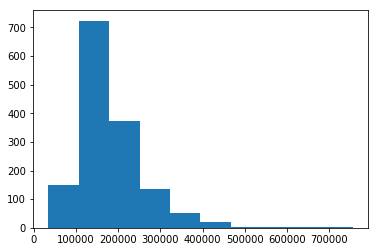

In [6]:
#Train.SalePrice.plot(kind='box')
plt.hist(Train.SalePrice)
#plt.density(Train.SalePrice)
plt.show()

## Looking at the distribution of the data 
# There are very few records above the 500,000 mark.
# The prices in this range are exorbitant have no special feature hence dropping them is good idea 
# Given that they are additionally less than 3

In [8]:
Train[Train['SalePrice']>500000]


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
179,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
441,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
692,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
770,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
804,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
899,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657
1047,1047,60,RL,85.0,16056,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,556581
1170,1170,60,RL,118.0,35760,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,625000
1183,1183,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


In [24]:
Train["SalePrice"].skew()

1.8828757597682129

- Testing for the skew before dropping the outliers

In [8]:
#Dropping records greater than 510000
#Train = Train['SalePrice'] - Train[Train['SalePrice']>600000]
#Salesindex = Train[Train['SalePrice']>600000].index
#Train.drop(Salesindex,inplace=True)
#Train.drop(Train[Train['SalePrice']>520000].index,inplace=True)

In [9]:
#skewt = pd.DataFrame(np.log(Train["SalePrice"]))
#Train["SalePrice"] = pd.DataFrame(np.log(Train["SalePrice"]))
Train.drop(Train[Train['SalePrice']>520000].index,inplace=True)
Train["SalePrice"].skew()

1.2359845254980464

- Dropping the outlier has reduced the skew signifiacntly but its fair enough from 1.88 to 1.23

In [10]:
Train.shape

(1452, 81)

In [11]:
Train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
#xx =[x for x in Train.columns if x.dtypes=="O"]
#Train[Train.dtypes=="O"]
#XX = Train[Train.columns.dtypes=="O"]

## Filtering out columns that have categorical data to loo
arr=[]
for x,y in enumerate(Train.dtypes):
    if(y=="object"):
        arr.append(x)
x=Train.columns[arr]
print(x)
print(len(x))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
43


### Looking at t preview of the data these columns have a very suspicous
1. MasVnrArea
2. BsmtFinSF2
3. 2ndFlrSF
4. WoodDeckSF
5. OpenPorchSF
6. EnclosedPorch
7. 3SsnPorch
8. ScreenPorch
9. PoolArea
10. PoolQC
11. Fence
12. MiscFeature
13. MiscVal
14. MoSold
15. LowQualFinSF


### These Columns have abnormally many nulls given that the total getting rid of them is a very good idea. 


#### Cleaning the data by removiing the nulls 
- Alley           1369
- PoolQC           1453
- Fence            1179
- MiscFeature      1406
- LotFrontage      259
- FireplaceQu       690
#### Since these are few i could condider replacing  mean or median or totally dropping the rows

- BsmtQual           37
- BsmtCond           37
- BsmtExposure       38
- BsmtFinType1       37
- BsmtFinType2       38
- GarageType         81
- GarageYrBlt        81
- GarageFinish       81
- GarageQual         81
- GarageCond         81
- MasVnrType         8
- MasVnrArea         8

In [25]:


Train =Train.drop(axis=1,columns=["FireplaceQu","LotFrontage","MiscFeature","Fence","PoolQC","Alley"])
Tran =Train.dropna(axis=0, how="any",subset=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                                             "BsmtFinType2","GarageType","GarageYrBlt","GarageFinish",
                                             "GarageQual","GarageCond","MasVnrType","MasVnrArea","Electrical"
                                            ],inplace=True)
Test =Test.drop(axis=1,columns=["FireplaceQu","LotFrontage","MiscFeature","Fence","PoolQC","Alley"])

## This cannot work beacuse the data will be rejected by kaggle.
#Test =Test.dropna(axis=0, how="any",subset=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
                                            # "BsmtFinType2","GarageType","GarageYrBlt","GarageFinish",
                                             #"GarageQual","GarageCond","MasVnrType","MasVnrArea","Electrical"
                                            #],inplace=True)



#### Confirming there are no nulls

In [26]:

Train.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [16]:
#Handling Missing values int Test dataset
Test = Test.fillna(Test.mean())
Test.isna().sum().sum()

555

In [17]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 1 to 1460
Data columns (total 75 columns):
Id               1330 non-null int64
MSSubClass       1330 non-null int64
MSZoning         1330 non-null object
LotArea          1330 non-null int64
Street           1330 non-null object
LotShape         1330 non-null object
LandContour      1330 non-null object
Utilities        1330 non-null object
LotConfig        1330 non-null object
LandSlope        1330 non-null object
Neighborhood     1330 non-null object
Condition1       1330 non-null object
Condition2       1330 non-null object
BldgType         1330 non-null object
HouseStyle       1330 non-null object
OverallQual      1330 non-null int64
OverallCond      1330 non-null int64
YearBuilt        1330 non-null int64
YearRemodAdd     1330 non-null int64
RoofStyle        1330 non-null object
RoofMatl         1330 non-null object
Exterior1st      1330 non-null object
Exterior2nd      1330 non-null object
MasVnrType       1330 non-

## Encoding the categorical variables

In [27]:
#Encoding the categorical variables
# converting type of columns to 'category'
#bridge_df['Bridge_Types'] = bridge_df['Bridge_Types'].astype('category')
# Assigning numerical values and storing in another column
#bridge_df['Bridge_Types_Cat'] = bridge_df['Bridge_Types'].cat.codes
#bridge_df
Catcols = Train.select_dtypes(include="O")

for cols in Catcols:
    # converting type of columns to 'category'
    Train[cols] = Train[cols].astype('category')
    # Assigning numerical values 
    Train[cols] = Train[cols].cat.codes
Train.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,1,60,3,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
2,2,20,3,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
3,3,60,3,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
4,4,70,3,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,5,60,3,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [28]:
Testcols = Test.select_dtypes(include="O")
for cols in Testcols:
    # converting type of columns to 'category'
    Test[cols] =Test[cols].astype('category')
    # Assigning numerical values 
    Test[cols] = Test[cols].cat.codes
Test.head()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,1461,20,2,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1462,1462,20,3,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
1463,1463,60,3,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
1464,1464,60,3,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
1465,1465,120,3,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4


In [29]:
Train.describe()

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,731.228700,56.136024,3.023916,10706.294469,0.996263,1.903587,2.787743,0.000747,3.001495,0.063528,...,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,7.500000,3.804933,186761.782511
std,421.779691,41.252576,0.624383,10336.621126,0.061039,1.419114,0.687379,0.027338,1.630854,0.278365,...,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,1.580666,1.059942,78913.847668
min,1.000000,20.000000,0.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,35311.000000
25%,366.250000,20.000000,3.000000,7744.000000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,135000.000000
50%,730.500000,50.000000,3.000000,9600.000000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,168500.000000
75%,1098.750000,70.000000,3.000000,11760.750000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,220000.000000
max,1460.000000,190.000000,4.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


In [30]:
Test[["GrLivArea","OverallQual", "TotalBsmtSF","YearBuilt","YearRemodAdd","KitchenQual","GarageCars","1stFlrSF"]].isna().sum()

GrLivArea       0
OverallQual     0
TotalBsmtSF     1
YearBuilt       0
YearRemodAdd    0
KitchenQual     0
GarageCars      1
1stFlrSF        0
dtype: int64

# Permutation Importance

- I want to know which feature best contribute to my target variable so i use permutation importance to give the various features and corresponding weights.
- Advantage it return results in ascending order i.e. most weighted feature downwards
- I used XGBOOST because of its ability to learn while improving itself from previous runs.

In [31]:
X = Train.drop("SalePrice",axis=1) 
y=Train.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb1=XGBRegressor()
xgb1.fit(X_train, y_train)
perm = PermutationImportance(xgb1).fit(X_test, y_test)
eli5.show_weights(perm)

Weight,Feature
0.1916 ± 0.0524,x44
0.1727 ± 0.0497,x15
0.0291 ± 0.0155,x36
0.0214 ± 0.0079,x17
0.0198 ± 0.0139,x18
0.0136 ± 0.0074,x32
0.0136 ± 0.0056,x58
0.0125 ± 0.0034,x16
0.0117 ± 0.0147,x3
0.0070 ± 0.0072,x10


# Feature Selection And Description
1. 44 GrLivArea
  #### Above grade (ground) living area square feet
2. 15 OverallQual
   #### Rates the overall material and finish of the house
3. 36 TotalBsmtSF
   #### Total square feet of basement area
4. 17 YearBuilt
    #### Original construction date
5. 32 BsmtFinSF1
    #### Type 1 finished square feet
6. 18 YearRemodAdd
    #### Remodel date (same as construction date if no remodeling or additions)
7. 3 LotArea
    #### Lot size in square feet
8. 51 KitchenQual
    #### Kitchen quality
9. 16 OverallCond
    #### Rates the overall condition of the house
10. 58 GarageCars
    #### Size of garage in car capacity
11.  28 ExterCond
    #### Evaluates the present condition of the material on the exterior
12.  1 MSSubClass
    #### Identifies the type of dwelling involved in the sale.
13. 2 MSZoning
    #### Identifies the general zoning classification of the sale.
14. 57 FireplaceQu
    #### Fireplace quality
15. 41 1stFlrSF
    


In [26]:
Train1 =Train[["GrLivArea","OverallQual", "TotalBsmtSF","YearBuilt","BsmtFinSF1","YearRemodAdd","LotArea",
"KitchenQual","GarageCars","ExterCond","MSZoning","1stFlrSF","SalePrice"]]
Train1.shape

(1330, 13)

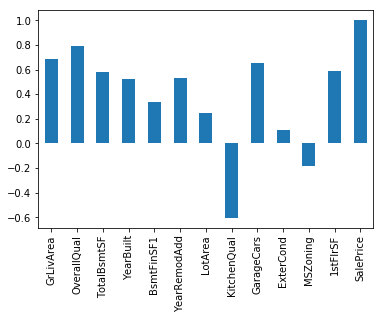

In [27]:
Train1.corr()['SalePrice'].plot(kind="bar")

In [28]:
## Since we only what features that are highly correlated we will drop the 
#OverallCond and MSSUblass from the train dataset.

# Checking for the skewness of the varibles

In [32]:
print(Train["GrLivArea"].skew())
print(Train["OverallQual"].skew())
print(Train["TotalBsmtSF"].skew())
print(Train["BsmtFinSF1"].skew())
print(Train["GarageCars"].skew())
print(Train["LotArea"].skew())
print(Train["1stFlrSF"].skew())
#print(Train["KitchenQual"].skew())



1.4303065521805058
0.3152182507338383
2.2140290503914315
1.6933967482122714
0.20043156804713985
11.938123813941802
1.397431197394902


####  In a bid to make my work more understandable I figured out my i was getttig the error. 
- I did a log transformation on all may skewed data this is what led to my infinity values for columns 
- TotalBsmtSF
- BsmtFinSF1
- These two columns are positively skewed and these are negatively skewed
- MSZoning
- KitchenQual

In [33]:
Train[["1stFlrSF","TotalBsmtSF","GrLivArea","BsmtFinSF1","LotArea"]] = pd.DataFrame(np.log(Train[["1stFlrSF","TotalBsmtSF","GrLivArea","BsmtFinSF1","LotArea"]]))
Test[["1stFlrSF","TotalBsmtSF","GrLivArea","BsmtFinSF1","LotArea"]] = pd.DataFrame(np.log(Test[["1stFlrSF","TotalBsmtSF","GrLivArea","BsmtFinSF1","LotArea"]]))

In [12]:
Train.iloc[1:5,41].head()

Id
2    Y
3    Y
4    Y
5    Y
Name: CentralAir, dtype: object

In [34]:
# Potential columns for data analysis
#Train["YearBuilt"] = pd.to_datetime(Train["YearBuilt"],format="%y")
#Train["YearRemodAdd"] = pd.to_datetime(Train["YearRemodAdd"],format="%y")
#Train.dtypes[:30]

#Train =Train[["GrLivArea","OverallQual","TotalBsmtSF","YearBuilt","BsmtFinSF1","YearRemodAdd","LotArea","KitchenQual",
 #     "OverallCond","GarageCars","ExterCond","MSSubClass","MSZoning","FireplaceQu","SalePrice"]]
#Train =Train.SalePrice

#Train =Train[["GrLivArea","OverallQual", "TotalBsmtSF","YearBuilt","BsmtFinSF1","YearRemodAdd","LotArea",
#"KitchenQual","GarageCars","ExterCond","MSZoning","1stFlrSF","SalePrice"]]

#Train.drop(Train[["ExterCond","KitchenQual","MSZoning","LotArea","BsmtFinSF1"]],axis=0)
#,"KitchenQual"
#,"KitchenQual"
#,"YearBuilt"
#,"YearBuilt"
#,"YearRemodAdd"
#,"YearBuilt"
#,"YearBuilt"
Train =Train[["GrLivArea","OverallQual", "TotalBsmtSF","YearRemodAdd","LotArea","GarageCars","1stFlrSF","SalePrice"]]

Test = Test[["GrLivArea","OverallQual", "TotalBsmtSF","YearRemodAdd","LotArea","GarageCars","1stFlrSF"]]
Test = Test.fillna(Test.mean())

In [14]:
Test

,GrLivArea,OverallQual,TotalBsmtSF,YearRemodAdd,LotArea,GarageCars,1stFlrSF
Id,,,,,,,
1461,896,5,882.0,1961,11622,1.0,896
1462,1329,6,1329.0,1958,14267,1.0,1329
1463,1629,5,928.0,1998,13830,2.0,928
1464,1604,6,926.0,1998,9978,2.0,926
1465,1280,8,1280.0,1992,5005,2.0,1280
...,...,...,...,...,...,...,...
2915,1092,4,546.0,1970,1936,0.0,546
2916,1092,4,546.0,1970,1894,1.0,546
2917,1224,5,1224.0,1996,20000,2.0,1224


In [35]:
Train.shape

(1338, 8)

In [36]:
Train.isna().sum()

GrLivArea       0
OverallQual     0
TotalBsmtSF     0
YearRemodAdd    0
LotArea         0
GarageCars      0
1stFlrSF        0
SalePrice       0
dtype: int64

# Data Rescaling

In [37]:
np.isinf(Train).sum()


GrLivArea       0
OverallQual     0
TotalBsmtSF     0
YearRemodAdd    0
LotArea         0
GarageCars      0
1stFlrSF        0
SalePrice       0
dtype: int64

In [38]:

#m = Test.loc[Test["TotalBsmtSF"] != np.inf,"TotalBsmtSF"].max()
Test["TotalBsmtSF"].replace(np.inf,Test["TotalBsmtSF"].median(),inplace=True)
np.isinf(Test).sum()

GrLivArea        0
OverallQual      0
TotalBsmtSF     42
YearRemodAdd     0
LotArea          0
GarageCars       0
1stFlrSF         0
dtype: int64

In [39]:
a= list(np.isinf(Test).sum().index)
b= list(np.isinf(Test).sum().values)
c =list(Test.isnull().sum().values)
d =list(Test.isna().sum().values)
#Strange = pd.DataFrame(a,b,c,d,)
#help(pd.DataFrame)
Strange=pd.DataFrame(list(zip(a,b,c,d)), columns=["Feature","Infinity values","null values","na values"])
Strange

,Feature,Infinity values,null values,na values
0,GrLivArea,0,0,0
1,OverallQual,0,0,0
2,TotalBsmtSF,42,0,0
3,YearRemodAdd,0,0,0
4,LotArea,0,0,0
5,GarageCars,0,0,0
6,1stFlrSF,0,0,0


In [40]:
Test.isnull().sum()

GrLivArea       0
OverallQual     0
TotalBsmtSF     0
YearRemodAdd    0
LotArea         0
GarageCars      0
1stFlrSF        0
dtype: int64

In [41]:
# Data splitting and Reshaping
array = Train.values
arr_Test = Test.values
# separate array into input and output components
#X = array[:,0:8]
#Y = array[:,8]
X = array[:,0:7]
Y = array[:,7]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# Recaling the My Test data
scalert = MinMaxScaler(feature_range=(0,1))
rescaledTest =scalert.fit_transform(arr_Test)
seed =42
# splitting the faeture array and label array keeping 80% for the trainnig sets
#X_train,X_test,y_train,y_test = train_test_split(rescaledX,y,test_size=0.20,shuffle=True,random_state=seed)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=seed)
# normalize: Scale input vectors individually to unit norm (vector length).
X_train = normalize(X_train)
X_test=normalize(X_test)
#X_train.head()

ValueError: Input contains infinity or a value too large for dtype('float64').

# Principle Component Analysis

In [ ]:
# This segment of code is where the principle component analysis is done.

n_comp = 4

# tSVD
tsvd = TruncatedSVD(n_components=n_comp, random_state=420)
tsvd_train = tsvd.fit_transform(X_train)
tsvd_test = tsvd.transform(X_test)

# PCA Train
pca = PCA(n_components=n_comp, random_state=420)
pca2_train = pca.fit_transform(X_train)
pca2_test = pca.transform(X_test)

#PCA Test
pca = PCA(n_components = n_comp, random_state=420)
#pca2_test = pca.fit_transform(Test)
# ICA
ica = FastICA(n_components=n_comp, random_state=420)
ica2_train = ica.fit_transform(X_train)
ica2_test = ica.transform(X_test)

# GRP
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_results_train = grp.fit_transform(X_train)
grp_results_test = grp.transform(X_test)

# SRP
srp = SparseRandomProjection(n_components=n_comp, dense_output=True, random_state=420)
srp_results_train = srp.fit_transform(X_train)
srp_results_test = srp.transform(X_test)

# NMF
nmf = NMF(n_components=n_comp, init='nndsvdar', random_state=420)
nmf_results_train = nmf.fit_transform(X_train)
nmf_results_test = nmf.transform(X_test)

## FAG
fag = cluster.FeatureAgglomeration(n_clusters=n_comp, linkage='ward')
fag_results_train = fag.fit_transform(X_train)
fag_results_test = fag.transform(X_test)

### Scoring Algorithms
#### Mean Absolute Error
- The mean absolute Error is the average of the absolute differences between predictions and actual values.
- It gives an idea of how wrong the predictions are. 
- A value of 0 indicates no error or perfect predications
- Like logloass the metric is inverted by cross_val_score() function
- #neg_mean_absolute_error


#### Mean Squared Error
- This is simillar to the Mean absolute error in that it provides a gross idea of the magnitude of error.
- Taking thesquare root of the mean squared error converts the units back into the original units of the output variable and can be meaningful for description and presentation.
- #neg_mean_squred_error


#### R2 metric
- The R2 metric provides an indication of the goodness of fit of a set of predications to teh actual values.
- In statistical it is called the coefficient of determination. 
- The value is between 0 and 1
- #r2

# SPOT CHECKING THE ALGORITHMS

In [ ]:
#SPOT CHECKING THE ALGORITHMS
# Spot-Check Algorithms

models = []
models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
#models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
#models.append(('NN',MLPRegressor()))#//Poor performance
models.append(('SG',SGDRegressor()))
models.append(('REG',RidgeCV()))
models.append(('BRR',BayesianRidge()))
#models.append(('VR',VotingRegressor(estimators=[('KNN',),('REG',RidgeCV())])))
models.append(('XGBOOST',XGBRegressor()))

## Root Mean Squared Log Error
#rmsle = math.sqrt(mean_squared_log_error())
#rmsle = make_scorer(math.sqrt(mean_squared_log_error()))
# evaluate each model in turn

def rmsle(y,ypred):
    y =np.array(y)
    ypred=np.array(ypred)
    assert len(y) == len(ypred)
    # X_used: numpy.ndarray  {n_samples, n_features_used}
    terms_to_sum= [(math.log(ypred[i]+1) - math.log(y[i]+1)) **2.0 for i,pred in enumerate(ypred)]
    return (sum(terms_to_sum)* (1.0/len(y))) ** 0.5

#scorer = {'main': 'r2',
 #         'custom_rmsle': make_scorer(rmsle,needs_xvals = True)}


results = []
names = []
seed =25
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed,shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, 
    scoring='r2')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
#print(msg)

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

```
sorted(sklearn.metrics.SCORERS.keys())
help(type(LogisticRegression))
```

In [ ]:
#Gaussian Process Regressor
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
model.fit(X_train, y_train)
params = model.kernel_.get_params()
y_pred, std = model.predict(X_test, return_std=True)
MSE = ((y_pred-y_test)**2).mean()
MSE1 = mean_squared_error(y_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(RMSLE)
r2 = r2_score(y_pred,y_test)
print(MSE1)
print(r2)

In [ ]:
#Voting Classifier
REG = RidgeCV()
REG.fit(X_train,y_train)

KNN = KNeighborsRegressor()
KNN.fit(X_train,y_train)

XGB = XGBRegressor()
XGB.fit(X_train,y_train)

ensemble=VotingRegressor(estimators=[('REG', REG),('knn',KNN),("XGBOOST",XGB)])
y_pred =ensemble.fit(X_train,y_train).predict(X_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(RMSLE)
print(r2_score(y_test, y_pred))
print(r2_score(y_pred,y_test ))

Test = normalize(rescaledTest)
knn_pred =ensemble.predict(Test)
fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(knn_pred)
#frpred["Id"] = Test["Id"]
fypred.to_csv("Voting_classier.csv", header =["Id","SalePrice"], index =False,sep="," )

In [ ]:
#X=Train.drop("SalePrice",axis=1)
#y=Train["SalePrice"]
#seed=42
# splitting the faeture array and label array keeping 80% for the trainnig sets
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,shuffle=True,random_state=seed)

D_train = xgb.DMatrix(X_train,label=y_train)
D_test = xgb.DMatrix(X_test,label=y_test)
params={'eta':0.3,'max_depth':3,'objective':'multi:softprob', 'num_class':3}
steps=40
#XGB = xgb.train(params,D_train,steps)
##Predictions
#preds =XGB.predict(D_test)
#best_preds =pd.DataFrame(np.asarray([np.argmax(line) for line in preds]))
#y_test=pd.DataFrame(y_test)
#MSE = mean_squared_error(best_preds,y_test)
#accuracy_score  = accuracy_score(y_test,best_preds)
#Gradient Boostin Regression
#params={'n_estimators':500,'max_depth':4,'min_samples_split':2,'learning_rate':0.01,'loss':'ls'}
#clf=GradientBoostingRegressor(params)
#clf.fit(X_train,y_train)
#mse = mean_squared_error(y_test,clf.predict(X_test))

# Hyperparameter tunning

In [ ]:
# Grid Searsch Ridge Regressor

parameters = [{'alpha':[0.001,0.1,1,100,1000,10000]}]
RR = Ridge()
Grid1 = GridSearchCV(RR,parameters,cv=4)
Grid1.fit(X_train,y_train)
print(Grid1.best_estimator_)
scores = Grid1.cv_results_
print(scores['mean_test_score'])
Grid_pred = Grid1.predict(X_test)
MSE = mean_squared_error(Grid_pred,y_test)
r2 = r2_score(Grid_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(Grid_pred, y_test))
rmsle1 =rmsle(Grid_pred, y_test)
print(MSE)
print(r2)
print(RMSLE)
print(rmsle1)

alpha_vals =  [0.001, 0.1, 1, 100, 1000, 10000]

In [ ]:
# KNN
# Number of neighbors to use by default for kneighbors queries.
k_range = list(range(1, 16))
param_grid = dict(n_neighbors=k_range,p=[1,2])
#param_grid={'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],'p':[1,2]}
knn = KNeighborsRegressor()
grid = GridSearchCV(knn, param_grid, cv=10, scoring='r2')
grid.fit(X_train,y_train)
print(grid.best_estimator_)
scores = grid.cv_results_

print(scores['mean_test_score'])


knn=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=9, p=1,
                    weights='uniform')
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
MSE = mean_squared_error(knn_pred,y_test)
r2 = r2_score(knn_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(knn_pred,y_test))

print(MSE)
print(r2)
print(RMSLE)
#Test =Test.fillna(Test.mean(),inplace=True)
#Test.reshape(-1, 1)
Test = normalize(rescaledTest)
knn_pred =knn.predict(Test)

fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(knn_pred)
fypred.to_csv("Knn_rescaled2.csv", header =["Id","SalePrice"], index = False,sep="," )
#Test

In [ ]:
# plot the results
# this is identical to the one we generated above
mean_score = np.array(scores['mean_test_score'])
k_range = np.array(k_range)
#plt.plot(k_range, mean_score)
#plt.xlabel('Value of K for KNN')
#plt.ylabel('Cross-Validated Accuracy')

In [ ]:
#GridSearch XGBOOST
#"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
X_test = normalize(X_test)
parameters ={
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "eta"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ]
 }
model = XGBRegressor()
Grid2 = GridSearchCV(model,parameters,cv=10)
Grid2.fit(X_train,y_train)
y_pred = Grid2.predict(X_test)
#y_pred = pd.DataFrame(y_pred)
MSE = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(MSE)
print(r2)
print(RMSLE)



In [ ]:
Grid2.best_estimator_

In [ ]:
# XGBoost
params={'eta':0.3,'max_depth':3,'objective':'multi:softprob', 'num_class':3}
steps = 40
#{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 #"max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 #"min_child_weight" : [ 1, 3, 5, 7 ],
 #"gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 #"colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }
#eta=0.3,max_depth=4
model = XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
                     colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
                     gpu_id=-1, importance_type='gain', interaction_constraints=None,
                     learning_rate=0.100000001, max_delta_step=0, max_depth=5,
                     min_child_weight=7,  monotone_constraints=None,
                     n_estimators=100, n_jobs=0, num_parallel_tree=1,
                     objective='reg:squarederror', random_state=0, reg_alpha=0,
                     reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
                     validate_parameters=False, verbosity=None)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = pd.DataFrame(y_pred)
MSE = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(MSE)
print(r2)
print(RMSLE)

Test = normalize(rescaledTest)
grid_preds =model.predict(rescaledTest)
fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(grid_preds)
#frpred["Id"] = Test["Id"]
fypred.to_csv("XGBOOST_rescaled.csv", header =["Id","SalePrice"], index = False,sep="," )

# Voting Regressor with hyperparameterss

In [ ]:
#Voting Classifier
CART = DecisionTreeRegressor()
CART.fit(X_train,y_train)

KNN = KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=1,
                    weights='uniform')
KNN.fit(X_train,y_train)

XGB = XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
                     colsample_bynode=1, colsample_bytree=1, eta=0.1, gamma=0,
                     gpu_id=-1, importance_type='gain', interaction_constraints=None,
                     learning_rate=0.100000001, max_delta_step=0, max_depth=4,
                     min_child_weight=7,  monotone_constraints=None,
                     n_estimators=100, n_jobs=0, num_parallel_tree=1,
                     objective='reg:squarederror', random_state=0, reg_alpha=0,
                     reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
                     validate_parameters=False, verbosity=None)
XGB.fit(X_train,y_train)

ensemble=VotingRegressor(estimators=[('CART', CART),('knn',KNN),("XGBOOST",XGB)])
y_pred =ensemble.fit(X_train,y_train).predict(X_test)
RMSLE = math.sqrt(mean_squared_log_error(y_pred,y_test))
print(RMSLE)
print(r2_score(y_test, y_pred))
print(r2_score(y_pred,y_test ))

Test = normalize(rescaledTest)
VC_test =ensemble.predict(Test)
fypred =pd.DataFrame(Ids)
fypred["SalePrice"] = pd.DataFrame(VC_test)
#frpred["Id"] = Test["Id"]
fypred.to_csv("Voting_classier_HP.csv", header =["Id","SalePrice"], index =False,sep="," )